In [51]:
import nltk

In [89]:
from nltk.corpus import stopwords

In [90]:
import re

In [91]:
from nltk.stem.porter import PorterStemmer

In [92]:
from nltk.stem import WordNetLemmatizer

In [174]:
sentence="""During my lifetime I have dedicated myself to this struggle of the African people I have fought against white domination, and I have fought against black domination I have cherished the ideal of a democratic and free society in which all persons live together in harmony and with equal opportunities It is an ideal which I hope to live for and to achieve But if needs be, it is an ideal for which I am prepared to die."""

In [175]:
ps= PorterStemmer()
wn= WordNetLemmatizer()

In [200]:
job = nltk.sent_tokenize(sentence)
corpus = []
for i in range(len(job)):
    review = re.sub('[^a-zA-Z]', ' ', job[i])
    review = review.lower()
    review = review.split()
    review = [wn.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    #review=[wn.lemmatize(word) for word in review]
    review = ' '.join(review)
    corpus.append(review)
    

In [201]:
corpus=corpus[0].split(' ')
print(corpus, len(corpus))

['lifetime', 'dedicated', 'struggle', 'african', 'people', 'fought', 'white', 'domination', 'fought', 'black', 'domination', 'cherished', 'ideal', 'democratic', 'free', 'society', 'person', 'live', 'together', 'harmony', 'equal', 'opportunity', 'ideal', 'hope', 'live', 'achieve', 'need', 'ideal', 'prepared', 'die'] 30


In [178]:
import pandas as pd

In [179]:
data=pd.read_excel("FIRST_8_EMO.xlsx")
data_vad=pd.read_excel("VAD.xlsx")

In [180]:
data.head()

,word,emotion,emotion-intensity-score
0,outraged,anger,0.964
1,brutality,anger,0.959
2,hatred,anger,0.953
3,hateful,anger,0.940
4,terrorize,anger,0.939


In [181]:
data_vad.head()

,Word,Valence,Arousal,Dominance
0,aaaaaaah,0.479,0.606,0.291
1,aaaah,0.520,0.636,0.282
2,aardvark,0.427,0.490,0.437
3,aback,0.385,0.407,0.288
4,abacus,0.510,0.276,0.485


In [182]:
data.fillna(0, inplace=True)
datas=pd.get_dummies(data, columns=['emotion'])

In [183]:

datas['emotion_sadness']=datas['emotion_sadness'].multiply(datas['emotion-intensity-score'])
datas['emotion_anger']=datas['emotion_anger'].multiply(datas['emotion-intensity-score'])
datas['emotion_anticipation']=datas['emotion_anticipation'].multiply(datas['emotion-intensity-score'])
datas['emotion_fear']=datas['emotion_fear'].multiply(datas['emotion-intensity-score'])

datas['emotion_joy']=datas['emotion_joy'].multiply(datas['emotion-intensity-score'])
datas['emotion_disgust']=datas['emotion_disgust'].multiply(datas['emotion-intensity-score'])
datas['emotion_surprise']=datas['emotion_surprise'].multiply(datas['emotion-intensity-score'])
datas['emotion_trust']=datas['emotion_trust'].multiply(datas['emotion-intensity-score'])

del datas['emotion-intensity-score']

In [184]:
datas[datas['emotion_trust']!=0]
datas[datas['word']=='happy' ]

,word,emotion_anger,emotion_anticipation,emotion_disgust,emotion_fear,emotion_joy,emotion_sadness,emotion_surprise,emotion_trust
1771,happy,0.0,0.555,0.0,0.0,0.000,0.0,0.0,0.000
5343,happy,0.0,0.000,0.0,0.0,0.788,0.0,0.0,0.000
8740,happy,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.609


In [185]:
datas.loc[datas['word'].isin(corpus)]

,word,emotion_anger,emotion_anticipation,emotion_disgust,emotion_fear,emotion_joy,emotion_sadness,emotion_surprise,emotion_trust
295,domination,0.688,0.000,0.0,0.000,0.000,0.000,0.000,0.000
876,struggle,0.453,0.000,0.0,0.000,0.000,0.000,0.000,0.000
1491,hope,0.000,0.773,0.0,0.000,0.000,0.000,0.000,0.000
1581,opportunity,0.000,0.648,0.0,0.000,0.000,0.000,0.000,0.000
2069,prepared,0.000,0.438,0.0,0.000,0.000,0.000,0.000,0.000
2334,white,0.000,0.234,0.0,0.000,0.000,0.000,0.000,0.000
3645,die,0.000,0.000,0.0,0.766,0.000,0.000,0.000,0.000
3732,struggle,0.000,0.000,0.0,0.719,0.000,0.000,0.000,0.000
4120,domination,0.000,0.000,0.0,0.566,0.000,0.000,0.000,0.000
5452,harmony,0.000,0.000,0.0,0.000,0.719,0.000,0.000,0.000


In [186]:
datas.loc[datas['word'].isin(corpus)].sum(axis = 0, skipna = True) 

word                    dominationstrugglehopeopportunitypreparedwhite...
emotion_anger                                                       1.141
emotion_anticipation                                                2.093
emotion_disgust                                                         0
emotion_fear                                                        2.051
emotion_joy                                                         3.633
emotion_sadness                                                     1.902
emotion_surprise                                                    0.367
emotion_trust                                                       3.031
dtype: object

In [187]:
import matplotlib.pyplot as plt
%matplotlib inline

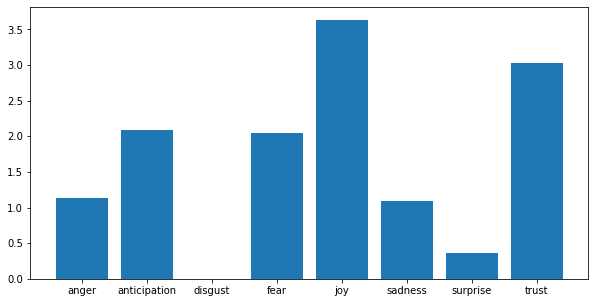

In [188]:
plt.figure(figsize=(10, 5))

plt.bar(['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust'] ,[1.141, 2.093, 0, 2.051, 3.633, 1.092, 0.367, 3.031])
plt.show()

In [189]:
data_vad.loc[data_vad['Word'].isin(corpus)]

,Word,Valence,Arousal,Dominance
148,achieve,0.816,0.545,0.843
362,african,0.490,0.423,0.555
1776,black,0.326,0.339,0.390
4630,democratic,0.802,0.519,0.798
4891,die,0.031,0.765,0.259
5330,domination,0.505,0.786,0.959
6022,equal,0.781,0.178,0.407
7143,free,0.896,0.500,0.544
8118,harmony,0.949,0.230,0.509
8517,hope,0.927,0.317,0.739


In [193]:
data_vad.loc[data_vad['Word'].isin(corpus)].sum(axis = 0, skipna = True)

Word         achieveafricanblackdemocraticdiedominationequa...
Valence                                                 15.071
Arousal                                                 10.682
Dominance                                               13.614
dtype: object

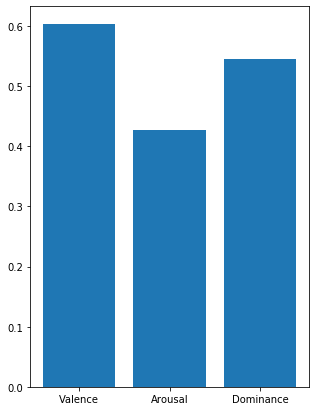

In [210]:
plt.figure(figsize=(5, 7))

plt.bar(['Valence', 'Arousal', 'Dominance'] ,[15.071/25, 10.682/25, 13.614/25])

plt.show()

In [134]:
from nltk.corpus import wordnet


for i in range(0, len(corpus)):
    for syn in wordnet.synsets(corpus[i]):
        synonyms = []
        antonyms = []
        for l in syn.lemmas():
            synonyms.append(l.name())
            if l.antonyms():
                antonyms.append(l.antonyms()[0].name())
        print(corpus[i]+ ":",synonyms)
        print(corpus[i]+ ":", antonyms)

lifetime: ['life', 'lifetime', 'life-time', 'lifespan']
lifetime: []
dedicated: ['give', 'dedicate', 'consecrate', 'commit', 'devote']
dedicated: []
dedicated: ['dedicate']
dedicated: []
dedicated: ['dedicate']
dedicated: []
dedicated: ['dedicate']
dedicated: []
dedicated: ['dedicated']
dedicated: ['undedicated']
dedicated: ['consecrated', 'consecrate', 'dedicated']
dedicated: ['desecrated']
struggle: ['struggle', 'battle']
struggle: []
struggle: ['conflict', 'struggle', 'battle']
struggle: []
struggle: ['struggle']
struggle: []
struggle: ['fight', 'struggle']
struggle: []
struggle: ['struggle']
struggle: []
struggle: ['clamber', 'scramble', 'shin', 'shinny', 'skin', 'struggle', 'sputter']
struggle: []
struggle: ['contend', 'fight', 'struggle']
struggle: []
african: ['African']
african: []
african: ['African']
african: []
people: ['people']
people: []
people: ['citizenry', 'people']
people: []
people: ['people']
people: []
people: ['multitude', 'masses', 'mass', 'hoi_polloi', 'people',